In [ ]:
"""
Bike Rides and the Poisson Model

To help the urban planners, you are called to model the daily bike rides in NYC using this dataset.
The dataset contains date, day of the week, high and low temp, precipitation and bike ride couunts as columns.
"""

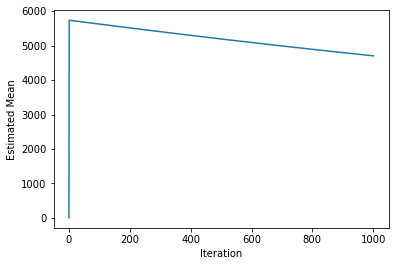

In [5]:
"""
Maximum Likelihood I
The obvious choice in distributions is the Poisson distribution which depends only on one parameter,
λ, which is the average number of occurrences per interval. We want to estimate this parameter using
Maximum Likelihood Estimation.

Implement a Gradient Descent algorithm from scratch that will estimate the Poisson distribution according
to the Maximum Likelihood criterion. Plot the estimated mean vs iterations to showcase convergence towards the true mean.

"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Dataset
dataset = pd.read_csv('C:/Users/Hrithikka/OneDrive/Desktop/njit/nyc_bb_bicyclist_counts.csv')

#likelihood function
def poisson_likelihood(la, dataset):
    log_likelihood = np.sum(dataset * np.log(la) - la - np.log(np.math.factorial(dataset)))
    return log_likelihood

#Gradient of the likelihood function
def poisson_gradient(la, dataset):
    gradient = np.sum(dataset/la - 1)
    return gradient

#Parameter lambda
la = 1.0

#learning rate & no of iterations
alpha = 0.01
nofiter = 1000

#Gradient descent algorithm
la_hist = [la]
for i in range(nofiter):
    gradient = poisson_gradient(la, dataset['BB_COUNT'])
    la = la + alpha * gradient
    la_hist.append(la)

# Plot of the estimated mean vs iterations
plt.plot(la_hist)
plt.xlabel('Iteration')
plt.ylabel('Estimated Mean')
plt.show()


In [7]:
"""
Maximum Likelihood II
A colleague of yours suggest that the parameter λ must be itself dependent on the weather and
other factors since people bike when its not raining. Assume that you model  λ  as
λi = exp(w^T xi)
where xi is one of the example features and w is a set of parameters.
Train the model with SGD with this assumption and compare the MSE of the predictions with the Maximum Likelihood I approach.
You may want to use this partial derivative of the log likelihood function

"""
import numpy as np
import pandas as pd

#Dataset
dataset = pd.read_csv('C:/Users/Hrithikka/OneDrive/Desktop/njit/nyc_bb_bicyclist_counts.csv')
X = dataset[['HIGH_T', 'LOW_T', 'PRECIP']].values
y = dataset['BB_COUNT'].values
w = np.zeros(X.shape[1])

#learning rate & no of Iterations
alpha = 0.01
nofiter = 1000

#Poisson Regression
def poisson_regression(xi, w):
    la = np.exp(np.clip(np.dot(w, xi), -709, 709))
    return la

#Gradient of the Poinson Regression
def gradient(xi, yi, w):
    return (yi - poisson_regression(xi, w)) * xi

for i in range(nofiter): 
    for xi, yi in zip(X, y): 
        w += alpha * gradient(xi, yi, w)

y_pred = np.exp(np.dot(X, w))
mse = np.mean((y - y_pred)**2)
print("MSE using Poisson regression with SGD: ", mse)

#Poisson Likelihood 
def poisson_likelihood_i(la, yi):
    log_likelihood_i = 0
    for i in range(len(yi)):
        log_likelihood_i += np.log(la[i]) * yi[i] - la[i] - np.sum(np.log(np.arange(1, yi[i]+1)))
    return log_likelihood_i

la_i = np.exp(np.dot(X, w))
y_pred_i = la_i
log_likelihood_i = poisson_likelihood_i(la_i, y)
mse_i = np.mean((y - y_pred_i)**2)
print("MSE using Maximum Likelihood I approach: ", mse_i)


C:\Users\Hrithikka\AppData\Local\Temp\ipykernel_2940\776800753.py:31: RuntimeWarning: overflow encountered in multiply
  return (yi - poisson_regression(xi, w)) * xi


MSE using Poisson regression with SGD:  7909742.387850467
MSE using Maximum Likelihood I approach:  7909742.387850467


C:\Users\Hrithikka\AppData\Local\Temp\ipykernel_2940\776800753.py:45: RuntimeWarning: divide by zero encountered in log
  log_likelihood_i += np.log(la[i]) * yi[i] - la[i] - np.sum(np.log(np.arange(1, yi[i]+1)))
